In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import random
from operator import add
from scipy.special import expit
import math
from tqdm import tqdm
import pickle as pk
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import pandas as pd

In [ ]:
class MyNeuralNetwork():
    """
    My implementation of a Neural Network Classifier.
    """

    acti_fns = ['relu', 'sigmoid', 'linear', 'tanh', 'softmax']
    weight_inits = ['zero', 'random', 'normal']

    def __init__(self, n_layers, layer_sizes, activation, learning_rate, weight_init, batch_size, num_epochs):
        """
        Initializing a new MyNeuralNetwork object

        Parameters
        ----------
        n_layers : int value specifying the number of layers

        layer_sizes : integer array of size n_layers specifying the number of nodes in each layer

        activation : string specifying the activation function to be used
                     possible inputs: relu, sigmoid, linear, tanh

        learning_rate : float value specifying the learning rate to be used

        weight_init : string specifying the weight initialization function to be used
                      possible inputs: zero, random, normal

        batch_size : int value specifying the batch size to be used

        num_epochs : int value specifying the number of epochs to be used
        """

        self.n_layers = n_layers
        self.layer_sizes = layer_sizes
        self.activation = activation
        self.learning_rate = learning_rate
        self.weight_init = weight_init
        self.batch_size = batch_size
        self.num_epochs = num_epochs

        if activation not in self.acti_fns:
            raise Exception('Incorrect Activation Function')

        if weight_init not in self.weight_inits:
            raise Exception('Incorrect Weight Initialization Function')
        #pass

    def compare_with_mlp(self,loss_from_your_model,X,y):
        # comparing with MLP
        # X is all data and Y is all labels
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

        self.mlp = MLPClassifier(hidden_layer_sizes=(256, 128, 64), activation ='relu',solver = 'sgd' , alpha = 0, batch_size = 1,max_iter=25, learning_rate_init = 0.01, learning_rate = 'constant',shuffle=True,momentum = 0,nesterovs_momentum=False,validation_fraction = 0.1)

        self.mlp.fit(X_train, y_train)

        self.output = self.mlp.score(X_test, y_test)
        print(self.output)

        loss_from_sklearn = self.mlp.loss_curve_
        print(loss_from_sklearn)

        plt.plot(loss_from_sklearn,label="sklearn")
        plt.plot(loss_from_your_model,label="your NN")
        plt.legend(loc="upper left")
        plt.savefig("result.png")
        plt.close()

    def relu(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array [zl = wlal-1 + bl]

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X [al]
        """

        X_calc = np.maximum(0.,X)
        return X_calc

    def relu_grad(self, X):
        """
        Calculating the gradient of ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array [zl]

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X [zl']
        """

        X_calc = np.greater(X, 0.).astype(np.float64)
        return X_calc

    def sigmoid(self, X):
        """
        Calculating the Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        X_calc = 1.0/(1+np.exp(-X))
        return X_calc

    def sigmoid_grad(self, X):
        """
        Calculating the gradient of Sigmoid activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        s = self.sigmoid(X)
        X_calc = s*(1-s)
        return X_calc

    def linear(self, X):
        """
        Calculating the Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        X_calc = X.copy()
        return X_calc

    def linear_grad(self, X):
        """
        Calculating the gradient of Linear activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        X_calc = np.ones(len(X))
        return X_calc

    def tanh(self, X):
        """
        Calculating the Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        X_calc = (np.exp(X)-np.exp(-X))/(np.exp(X)+np.exp(-X))
        return X_calc

    def tanh_grad(self, X):
        """
        Calculating the gradient of Tanh activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """
        t = self.tanh(X)
        X_calc = 1-t**2
        return X_calc

    def softmax(self, X):
        """
        Calculating the ReLU activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 1-dimensional numpy array after calculating the necessary function over X
        """

        #denom1 = np.sum([np.exp(x) for x in X])
        #X_calc = [np.exp(x)/denom1 for x in X]
        e_x = np.exp(X)
        return e_x / e_x.sum()
        #return np.array(X_calc)

    def softmax_grad(self, X):
        """
        Calculating the gradient of Softmax activation for a particular layer

        Parameters
        ----------
        X : 1-dimentional numpy array

        Returns
        -------
        x_calc : 2-dimensional numpy array after calculating the necessary function over X
        """

        """sm = self.softmax(X)
        X_calc = np.zeros((len(X), len(X)))
        for i in range(0, len(X)):
          for j in range(0, len(X)):
            if (i==j):
              X_calc[i][j] = sm[i]*(1-sm[i])
            else:
              X_calc[i][j] = -1*sm[i]*sm[j]"""
        soft = self.softmax(X)
        s = soft.reshape(-1,1)
        return np.diagflat(s) - np.dot(s, s.T)
        #return X_calc

    def zero_init(self, shape):
        """
        Calculating the initial weights after Zero Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated  nl-1 x nl

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """

        weight_calc = np.zeros((shape[1], shape[0]))
        return weight_calc

    def random_init(self, shape):
        """
        Calculating the initial weights after Random Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """

        weight_calc = np.random.uniform(-1,1,(shape[1],shape[0])) * 0.01
        return weight_calc

    def normal_init(self, shape):
        """
        Calculating the initial weights after Normal(0,1) Activation for a particular layer

        Parameters
        ----------
        shape : tuple specifying the shape of the layer for which weights have to be generated

        Returns
        -------
        weight : 2-dimensional numpy array which contains the initial weights for the requested layer
        """

        weight_calc = np.random.normal(size=[shape[1], shape[0]]) * 0.01
        return weight_calc

    def valloss(self, X, Y):
        """
        Predicting probabilities using the trained linear model.
​
        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.
​
        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the
            class wise prediction probabilities.
        """
        val_loss = 0.0
        x_input = X.copy()
        y_input = np.zeros((len(X), self.num_classes))
        for i in range(0, len(X)):
          ind = Y[i]
          y_input[i][int(ind)] = 1
        #print(pred_prob)
        for i in range(0, len(X)):
          #layer 0
          self.a[0] = x_input[i].copy()
          # FORWARD PASS
          for l in range(1, self.n_layers):
            self.z[l] = np.dot(self.weights[l], self.a[l-1])
            if (self.activation=='relu'):
              self.a[l] = self.relu(self.z[l])
            elif (self.activation=='sigmoid'):
              self.a[l] = self.sigmoid(self.z[l])
            elif (self.activation=='linear'):
              self.a[l] = self.linear(self.z[l])
            elif (self.activation=='tanh'):
              self.a[l] = self.tanh(self.z[l])
            elif (self.activation=='softmax'):
              self.a[l] = self.softmax(self.z[l])
            else:
              print("activation fun not valid!")

          self.z[self.n_layers] = np.dot(self.weights[self.n_layers], self.a[self.n_layers-1])
          self.a[self.n_layers] = self.softmax(self.z[self.n_layers])

          for j in range(0, 10):
            if (y_input[i][j]==1):
              break
          val_loss += np.log2(self.a[self.n_layers][j])

        # return the numpy array y which contains the predicted values
        return val_loss

    def fit(self, X, y, Xval, Yval):
        """
        Fitting (training) the linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as training data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as training labels.

        Returns
        -------
        self : an instance of self
        """
        self.train_loss = {}
        self.val_loss = {}
        count = 0

        for i in range(0,26):
          self.train_loss[i]=0.0
          self.val_loss[i]=0.0

        #step-0 - convert y to 1 hot encoded
        self.num_classes = 10 #10
        x_input = X.copy()
        #y_input = y.copy()
        y_input = np.zeros((len(X), self.num_classes))
        for i in range(0, len(X)):
          ind = y[i]
          y_input[i][int(ind)] = 1

        #INIT - x_input, y_input [one hot encoded]
        self.weights = {}
        self.bias = {}
        self.a = {}
        self.z = {}

        #layer 0 - input layer
        self.layer_sizes = np.insert(self.layer_sizes, 0, len(x_input[0]))

        #layer l - [1,#layers]
        for layer in range(1,self.n_layers+1):
          if (self.weight_init=='zero'):
            temp = [self.layer_sizes[layer-1], self.layer_sizes[layer]]
            self.weights[layer] = self.zero_init(temp)
          elif (self.weight_init=='random'):
            self.weights[layer] = self.random_init([self.layer_sizes[layer-1], self.layer_sizes[layer]])
          elif (self.weight_init=='normal'):
            self.weights[layer] = self.normal_init([self.layer_sizes[layer-1], self.layer_sizes[layer]])
          else:
            print("weight init not valid!")
          self.bias[layer] = np.zeros(self.layer_sizes[layer])
        pk.dump(nn.bias,open('bias'+str(1)+'.pkl','wb'), protocol=pk.HIGHEST_PROTOCOL)
        return

        """for l in range(1, self.n_layers+1):
          print("layer "+str(l))
          print(self.weights[l].shape)"""

        # MINI BATCH SGD
        for epoch in range(1,self.num_epochs+1):
          print("epoch : "+str(epoch))
          countl = 1
          left_indices = [i for i in range(0, len(x_input))]
          #random.shuffle(left_indices)
          #1500 iterations
          while(len(left_indices)>0):
            #0. init + random shuffle
            self.loss = 0
            self.deriv_weights = {}
            for l in range(1, self.n_layers+1):
              self.deriv_weights[l] = np.zeros((self.layer_sizes[l], self.layer_sizes[l-1]))

            #1. randomly sample batch_size samples without replacement
            indices = random.sample(left_indices, self.batch_size)
            left_indices = [i for i in left_indices if i not in indices]
            #random.shuffle(left_indices)

            for i in indices:
              #layer 0
              self.a[0] = x_input[i].copy()
              # FORWARD PASS
              for l in range(1, self.n_layers):
                self.z[l] = np.dot(self.weights[l], self.a[l-1])
                if (self.activation=='relu'):
                  self.a[l] = self.relu(self.z[l])
                elif (self.activation=='sigmoid'):
                  self.a[l] = self.sigmoid(self.z[l])
                elif (self.activation=='linear'):
                  self.a[l] = self.linear(self.z[l])
                elif (self.activation=='tanh'):
                  self.a[l] = self.tanh(self.z[l])
                elif (self.activation=='softmax'):
                  self.a[l] = self.softmax(self.z[l])
                else:
                  print("activation fun not valid!")
                #assertions
                assert self.z[l].ndim==1
                assert self.a[l].ndim==1
                assert(len(self.a[l])==self.layer_sizes[l])
                assert(len(self.z[l])==self.layer_sizes[l])
                #----------

              self.z[self.n_layers] = np.dot(self.weights[self.n_layers], self.a[self.n_layers-1])
              self.a[self.n_layers] = self.softmax(self.z[self.n_layers]) #softmax in last layer
              #assertions
              assert self.z[self.n_layers].ndim==1
              assert self.a[self.n_layers].ndim==1
              assert(len(self.a[self.n_layers])==self.layer_sizes[self.n_layers])
              assert(len(self.z[self.n_layers])==self.layer_sizes[self.n_layers])
              #----------
              #h_theta(x) = a[lastlayer]
              for j in range(0, 10):
                if (y_input[i][j]==1):
                    break
              loss1 = np.log2(self.a[self.n_layers][j])
              #self.loss = -1*np.log2(self.a[self.n_layers][y_input[i]]) #update for one hot encoded y

              """for l in range(1, self.n_layers+1):
                print("layer "+str(l))
                print(self.a[l].shape)
                print(self.z[l].shape)"""

              # BACKWARD PASS
              #update rule : w = w - alpha* dJ/dw
              self.delta = {}
              for layer in range(self.n_layers,0,-1):
                if (layer==self.n_layers):
                  #base case
                  self.delta[layer] = self.a[self.n_layers] - y_input[i]
                else:
                  if (self.activation=='relu'):
                    deriv_af = self.relu_grad(self.z[layer])
                  elif (self.activation=='sigmoid'):
                    deriv_af = self.sigmoid_grad(self.z[layer])
                  elif (self.activation=='linear'):
                    deriv_af = self.linear_grad(self.z[layer])
                  elif (self.activation=='tanh'):
                    deriv_af = self.tanh_grad(self.z[layer])
                  elif (self.activation=='softmax'):
                    deriv_af = self.softmax_grad(self.z[layer])
                  else:
                    print("activation fun grad not valid!")

                  """if self.delta[layer+1].ndim==1:
                    temp4 = self.delta[layer+1].reshape(len(self.delta[layer+1]), 1)
                  else:
                    temp4 = self.delta[layer+1].copy()"""
                  weight_del = np.dot(np.transpose(self.weights[layer+1]), self.delta[layer+1])
                  #assertions
                  assert self.delta[layer+1].ndim==1, str(self.delta[layer+1].shape)
                  #assert deriv_af.ndim==1 #violated in softmax grad
                  assert weight_del.ndim==1, str(weight_del.shape)+" "+str(layer) #must be 1 d (else @ would be bw 2 matrices (rn bw matrix and vector))
                  #---------
                  if deriv_af.ndim==1:
                    temp6 = deriv_af.reshape(len(deriv_af), 1)
                  else:
                    temp6 = deriv_af.copy()
                  if weight_del.ndim==1:
                    temp7 = weight_del.reshape(len(weight_del), 1)
                  else:
                    temp7 = weight_del.copy()
                  if (self.activation=='softmax'):
                    self.delta[layer] = temp6 @ temp7
                  else:
                    self.delta[layer] = np.multiply(temp6, temp7)
                  self.delta[layer] = self.delta[layer][:,0]

                #store weight gradients
                """if self.a[layer-1].ndim==1:
                  temp2 = self.a[layer-1].reshape(len(self.a[layer-1]),1) #CHANGED added this
                else:
                  temp2 = self.a[layer-1].copy()
                if self.delta[layer].ndim==1:
                  temp3 = self.delta[layer].reshape(len(self.delta[layer]),1) #CHANGED added this
                else:
                  temp3 = self.delta[layer].copy()"""
                self.deriv_weights[layer] += np.dot(self.delta[layer].reshape(len(self.delta[layer]), 1), self.a[layer-1].reshape(1, len(self.a[layer-1]))) #CHANGED TO delta dot at

            #update weights, biases
            for l in range(1, self.n_layers+1):
              self.weights[l] -= (self.learning_rate/self.batch_size) * self.deriv_weights[l]

            self.train_loss[count] += loss1
            #print(train_loss[epoch]/len(X))
            countl += 1
            if countl%1000==0:
              print("count : "+str(countl))
            if countl%9600==0:
              #self.val_loss[count] += self.valloss(Xval, Yval)
              #pk.dump(nn.weights,open('weights'+str(count)+'.pkl','wb'), protocol=pk.HIGHEST_PROTOCOL)
              #--
              vl = 0.0
              y_input1 = np.zeros((len(X_val), self.num_classes))
              for i1 in range(0, len(X_val)):
                ind = Y_val[i1]
                y_input1[i1][int(ind)] = 1
              #print(pred_prob)
              for i1 in range(0, len(X_val)):
                #layer 0
                self.a[0] = X_val[i1].copy()
                # FORWARD PASS
                for l in range(1, self.n_layers):
                  self.z[l] = np.dot(self.weights[l], self.a[l-1])
                  if (self.activation=='relu'):
                    self.a[l] = self.relu(self.z[l])
                  elif (self.activation=='sigmoid'):
                    self.a[l] = self.sigmoid(self.z[l])
                  elif (self.activation=='linear'):
                    self.a[l] = self.linear(self.z[l])
                  elif (self.activation=='tanh'):
                    self.a[l] = self.tanh(self.z[l])
                  elif (self.activation=='softmax'):
                    self.a[l] = self.softmax(self.z[l])
                  else:
                    print("activation fun not valid!")

                self.z[self.n_layers] = np.dot(self.weights[self.n_layers], self.a[self.n_layers-1])
                self.a[self.n_layers] = self.softmax(self.z[self.n_layers])

                for j in range(0, 10):
                  if (y_input1[i1][j]==1):
                    break
                vl += np.log2(self.a[self.n_layers][j])
              #--
              self.val_loss[count] = vl
              print(self.train_loss[count])
              print(self.val_loss[count])
              count += 1
              #print(self.val_loss[count])

          #val_loss[count] += self.valloss(Xval, Yval)
            #print(val_loss[epoch])

            if(count==13 or count==25):
              pk.dump(nn.weights,open('weightsrelu_'+str(count)+'.pkl','wb'), protocol=pk.HIGHEST_PROTOCOL)


        # fit function has to return an instance of itself or else it won't work with test.py
        return self

    def predict_proba(self, X):
        """
        Predicting probabilities using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 2-dimensional numpy array of shape (n_samples, n_classes) which contains the
            class wise prediction probabilities.
        """
        pred_prob = np.zeros((len(X), self.num_classes))
        x_input = X.copy()
        #print(pred_prob)
        for i in range(0, len(X)):
          #layer 0
          self.a[0] = x_input[i].copy()
          # FORWARD PASS
          for l in range(1, self.n_layers):
            self.z[l] = np.dot(self.weights[l], self.a[l-1])
            if (self.activation=='relu'):
              self.a[l] = self.relu(self.z[l])
            elif (self.activation=='sigmoid'):
              self.a[l] = self.sigmoid(self.z[l])
            elif (self.activation=='linear'):
              self.a[l] = self.linear(self.z[l])
            elif (self.activation=='tanh'):
              self.a[l] = self.tanh(self.z[l])
            elif (self.activation=='softmax'):
              self.a[l] = self.softmax(self.z[l])
            else:
              print("activation fun not valid!")

          self.z[self.n_layers] = np.dot(self.weights[self.n_layers], self.a[self.n_layers-1])
          self.a[self.n_layers] = self.softmax(self.z[self.n_layers])

          pred_prob[i] = self.a[self.n_layers].copy()

        # return the numpy array y which contains the predicted values
        #print(pred_prob)
        return pred_prob

    def predict(self, X):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        Returns
        -------
        y : 1-dimensional numpy array of shape (n_samples,) which contains the predicted values.
        """
        #get predicted prob
        pred_prob = self.predict_proba(X)
        pred = np.zeros(len(X))

        for i in range(0, len(X)):
          prob1 = pred_prob[i]
          pred[i] = np.argmax(prob1)

        # return the numpy array y which contains the predicted values
        return pred

    def score(self, X, y):
        """
        Predicting values using the trained linear model.

        Parameters
        ----------
        X : 2-dimensional numpy array of shape (n_samples, n_features) which acts as testing data.

        y : 1-dimensional numpy array of shape (n_samples,) which acts as testing labels.

        Returns
        -------
        acc : float value specifying the accuracy of the model on the provided testing set
        """
        self.a = {}
        self.z = {}
        self.num_classes=10
        #get predictions
        pred = self.predict(X)
        score = accuracy_score(y, pred)

        # return the numpy array y which contains the predicted values
        return score

MNIST Testing

more

In [ ]:
! gdown --id 1KlHddR1fMXyzzDoEJ0zIZEnEjwOQh3uN

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset = pd.read_csv("fashion-mnist_train.csv")
X = dataset.drop(["label"], axis=1).to_numpy()
Y = dataset["label"].to_numpy()

In [ ]:
norm = MinMaxScaler().fit(X_train)
X_train = norm.transform(X_train)
X_val = norm.transform(X_val)
X_test = norm.transform(X_test)

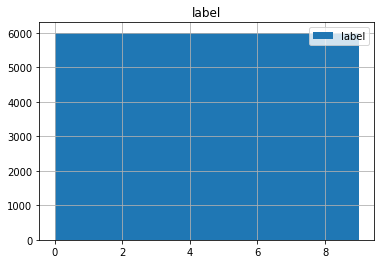

In [ ]:
# balanced classes
hist = dataset.hist(column='label',legend=True)

In [ ]:
#no null rows
sum(dataset.isnull().sum() == 1)

0

In [ ]:
# 80-10-10 split
#test_size = 0.1 as need to have 90% train-validation size and 10% test size
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X, Y, test_size=0.1)

#test_size=0.1/0.9 as need to have 10% validation set size and 80% train set size
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.1/0.9)

In [ ]:
X_train = X_train.astype('float64')
X_val = X_val.astype('float64')

In [ ]:
X_train.dtype

dtype('float64')

In [ ]:
l = 5
ls = np.array([len(X[0]), 256, 128, 64, 10])
a = 'relu'
lr = 0.01
wi = 'normal'
bs = 1
ne = 5
nn = MyNeuralNetwork(l,ls,a,lr,wi,bs,ne)

In [ ]:
nn.fit(X_train,Y_train, X_val, Y_val)

In [ ]:
pk.dump(nn.weights,open('weights.pkl','wb'), protocol=pk.HIGHEST_PROTOCOL)
weights = pk.load(open('weights.pkl','rb' ))

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
a1 = np.array(list(nn.train_loss.values()))/-9600
a2 = np.array(list(nn.val_loss.values()))/-6000

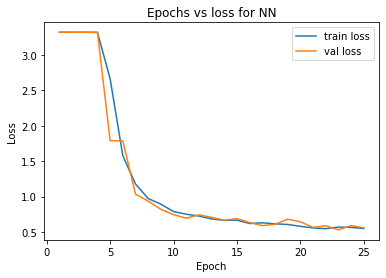

In [ ]:
plt.plot(np.arange(1,26),a1, label='train loss')
plt.plot(np.arange(1,26),a2, label='val loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Epochs vs loss for NN')
plt.legend()

In [ ]:
DF1 = pd.DataFrame(a1)
DF2 = pd.DataFrame(a2)
DF1.to_csv("trainloss_relu.csv")
DF2.to_csv("valloss_relu.csv")

In [ ]:
#test accuracies - epoch 25
nn.weights = pk.load(open('weights1_25.pkl','rb' ))

In [ ]:
nn.score(X_test, Y_test)

0.867

In [ ]:
#test accuracies - epoch 13
nn.weights = pk.load(open('weightsrelu_13 (1).pkl','rb' ))

In [ ]:
nn.score(X_test, Y_test)

0.8413333333333334

In [ ]:
lossmodel = pd.read_csv('trainloss_relu (1).csv', header=None)
lm = lossmodel[1][1:26]

In [ ]:
X = X.astype('float64')
norm = MinMaxScaler().fit(X)
X = norm.transform(X)

In [ ]:
nn.compare_with_mlp(lm, X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


0.8811666666666667
[0.534528542801962, 0.4128641356366644, 0.37387261899972224, 0.35035654258411814, 0.33000975831385004, 0.318002386713407, 0.30554919880790604, 0.29443866692361453, 0.28855784223329567, 0.2792210338070179, 0.27131752097197953, 0.26737050675682816, 0.25871877723751424, 0.25470054201195, 0.24674583525982977, 0.24310788786314824, 0.23968947573886662, 0.23705043487179583, 0.2329528769088019, 0.22791806117257993]
